In [1]:
%pylab inline
import matplotlib as mpl
mpl.rcParams['mathtext.default'] = 'rm'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import h5py, itertools, scipy.stats
import matplotlib.pyplot as plt
import sys, os, re
from scipy.special import erf
from scipy.optimize import curve_fit
from andrew_tools.simple_tools import high_low_limit
import Claires_modules

def normal_cdf(x,sigma,mu):
    return 0.5*(1.0+erf((x-mu)/(sigma*np.sqrt(2.0))))

[1.     0.9867 0.9734 0.9602 0.9469 0.9336 0.9203 0.907  0.8938 0.8805
 0.8672 0.8539 0.8406 0.8274 0.8141 0.8008 0.7875 0.7742 0.761  0.7477
 0.7344 0.7211 0.7078 0.6946 0.6813 0.668  0.6547 0.6414 0.6282 0.6149
 0.6016 0.5883 0.575  0.5618 0.5485 0.5352 0.5219 0.5086 0.4987 0.4854
 0.4721 0.4588 0.4456 0.4323 0.419  0.4057 0.3924 0.3792 0.3659 0.3526
 0.3393 0.3293 0.3161 0.3028 0.2895 0.2762 0.2629 0.25   0.2397 0.2264
 0.2131 0.2    0.1899 0.1766 0.1633 0.1501 0.1368 0.1235 0.1102 0.0969
 0.0837 0.0704 0.0571 0.     0.    ]
82 16


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in double_scalars


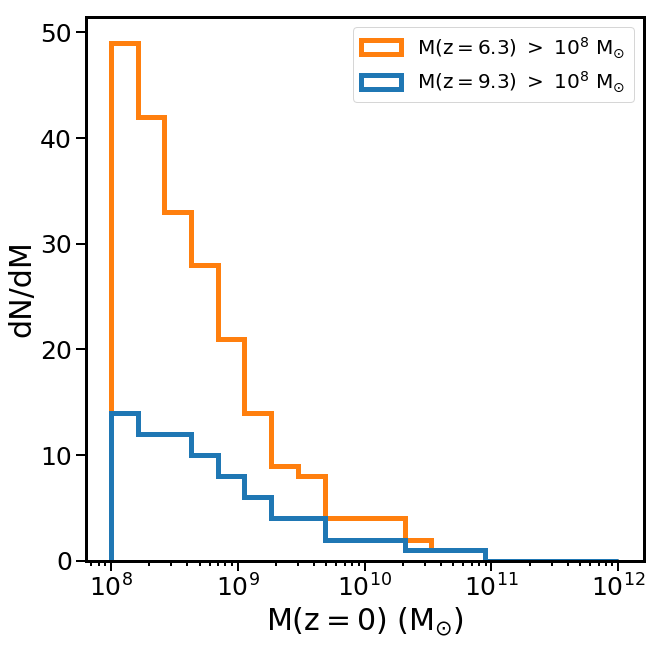

In [27]:
f = '/Users/andrewgraus/Work/ELVIS_files/ELVIS_Main_Branches/IsolatedTrees/iBurr/'

M_vir = np.loadtxt(f+'Mvir.txt')
X = np.loadtxt(f+'X.txt')
Y = np.loadtxt(f+'Y.txt')
Z = np.loadtxt(f+'Z.txt')
scale = np.loadtxt(f+'scale.txt')

print scale[0]

redshift = np.array([1.0/xx - 1.0 for xx in scale[0]])

z_six = -9 #z = 6.3
z_nine = -6 #z = 9.3

X_zero = X[:,0]
Y_zero = Y[:,0]
Z_zero = Z[:,0]

sat_dist = np.sqrt((X_zero-X_zero[0])**2.0+(Y_zero-Y_zero[0])**2.0+(Z_zero-Z_zero[0])**2.0)

M_zero = M_vir[:,0]
M_six = M_vir[:,z_six]
M_nine = M_vir[:,z_nine]

M_six_mask = (M_six>1.0e8)&(sat_dist<0.3)&(sat_dist>0.0)
M_nine_mask = (M_nine>1.0e8)&(sat_dist<0.3)&(sat_dist>0.0)

mass_list = np.logspace(8.0,12.0,20)

print np.sum(M_six_mask), np.sum(M_nine_mask)

fig1 = plt.figure(1,(10,10))
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)
plt.hist(M_zero[M_six_mask],bins=mass_list,cumulative=-1,color='C1',histtype='step',linewidth=5,label='$M(z=6.3)$ $>$ $10^8$ $M_{\odot}$')
plt.hist(M_zero[M_nine_mask],bins=mass_list,cumulative=-1,color='C0',histtype='step',linewidth=5,label='$M(z=9.3)$ $>$ $10^8$ $M_{\odot}$')
plt.xscale('log')
plt.xlabel('$M(z=0)$ $(M_{\odot})$',fontsize=30)
plt.ylabel('dN/dM',fontsize=30)
plt.legend(fontsize=20)
plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in double_scalars


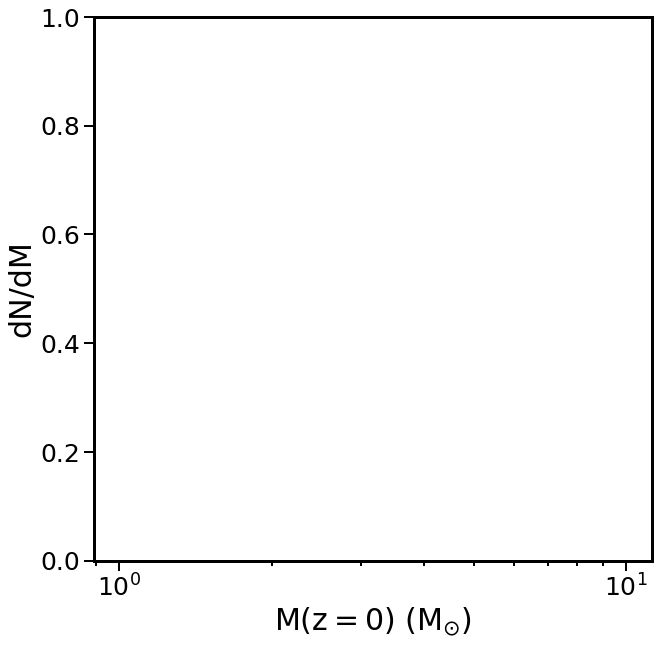

In [49]:
fig1 = plt.figure(1,(10,10))
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)

numbins = 25
six_hist_tot = np.zeros(numbins-1, dtype='int32')
nine_hist_tot = np.zeros(numbins-1, dtype='int32')
mass_list = np.logspace(7.0,12.0,numbins)

for iso_sim in os.listdir('/Users/andrewgraus/Work/ELVIS_files/ELVIS_Main_Branches/IsolatedTrees/'):
    f = '/Users/andrewgraus/Work/ELVIS_files/ELVIS_Main_Branches/IsolatedTrees/'+iso_sim+'/'

    M_vir = np.loadtxt(f+'Mvir.txt')
    X = np.loadtxt(f+'X.txt')
    Y = np.loadtxt(f+'Y.txt')
    Z = np.loadtxt(f+'Z.txt')
    scale = np.loadtxt(f+'scale.txt')

    redshift = np.array([1.0/xx - 1.0 for xx in scale[0]])

    z_six = -9 #z = 6.3
    z_nine = -6 #z = 9.3

    X_zero = X[:,0]
    Y_zero = Y[:,0]
    Z_zero = Z[:,0]

    sat_dist = np.sqrt((X_zero-X_zero[0])**2.0+(Y_zero-Y_zero[0])**2.0+(Z_zero-Z_zero[0])**2.0)

    M_zero = M_vir[:,0]
    M_six = M_vir[:,z_six]
    M_nine = M_vir[:,z_nine]

    M_six_mask = (M_six>1.0e8)&(sat_dist<0.3)&(sat_dist>0.0)
    M_nine_mask = (M_nine>1.0e8)&(sat_dist<0.3)&(sat_dist>0.0)

    #print iso_sim
    #print np.sum(M_six_mask), np.sum(M_nine_mask)

    six_hist, six_bins = np.histogram(M_zero[M_six_mask],bins=mass_list)
    six_hist_c = np.cumsum(six_hist[::-1])[::-1]
    six_hist_tot = np.vstack((six_hist_tot,six_hist_c))
    
    nine_hist, nine_bins = np.histogram(M_zero[M_nine_mask],bins=mass_list)
    nine_hist_c = np.cumsum(nine_hist[::-1])[::-1]
    nine_hist_tot = np.vstack((nine_hist_tot,nine_hist_c))

hist_six_med = np.median(six_hist_tot,axis=1)

hist_nine_med = np.median(nine_hist_tot,axis=1)
    
plt.xscale('log')
plt.xlabel('$M(z=0)$ $(M_{\odot})$',fontsize=30)
plt.ylabel('dN/dM',fontsize=30)
#plt.legend(fontsize=20)
plt.show()

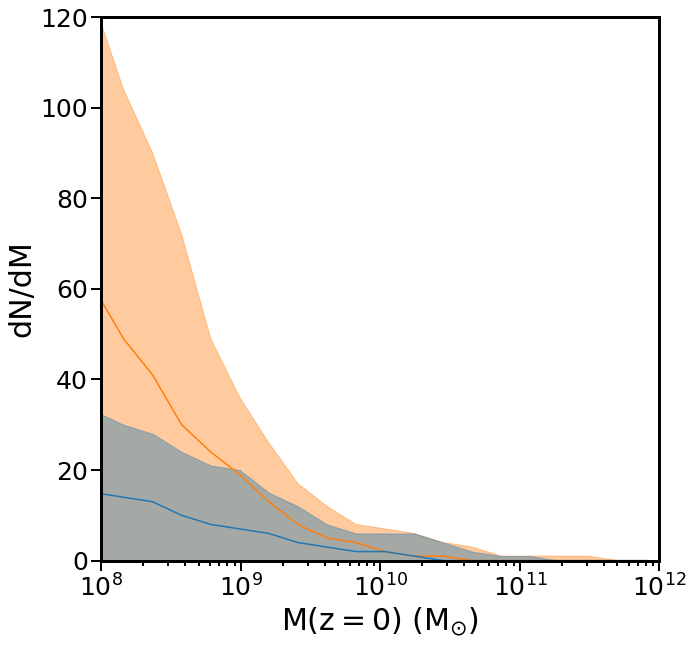

In [50]:
hist_six_med = np.median(six_hist_tot,axis=0)
hist_six_min = np.min(six_hist_tot,axis=0)
hist_six_max = np.max(six_hist_tot,axis=0)

hist_nine_med = np.median(nine_hist_tot,axis=0)
hist_nine_min = np.min(nine_hist_tot,axis=0)
hist_nine_max = np.max(nine_hist_tot,axis=0)

mbins_plot = np.array([(mass_list[xx+1]+mass_list[xx])/2.0 for xx in range(len(mass_list)-1)])

fig1 = plt.figure(1,(10,10))
rc('axes',linewidth=3)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.tick_params(which='minor',width=2,length=5)
plt.tick_params(which='major',width=2,length=10)

plt.plot(mbins_plot,hist_six_med,color='C1')
plt.fill_between(mbins_plot,hist_six_min,hist_six_max,color='C1',alpha=0.4)

plt.plot(mbins_plot,hist_nine_med,color='C0')
plt.fill_between(mbins_plot,hist_nine_min,hist_nine_max,color='C0',alpha=0.4)

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$M(z=0)$ $(M_{\odot})$',fontsize=30)
plt.ylabel('dN/dM',fontsize=30)
plt.xlim([1.0e8,1.0e12])
plt.ylim([0.0,120.0])

#plt.legend(fontsize=20)
plt.show()

In [53]:
#random nonsense here

Micm_dot = 5e-12 #Msun yr^-1 Lsun^-1

#number of novae is 20 /yr per 10^11 Lun

Nova_rate = 20.0/(1.0e11)

Micm_dot/Nova_rate

#So the argument is that this 0.03 in mass is a constant because the mass lost by a population of stars 
#is a constant per year per L_sun
#

0.024999999999999998

In [ ]:
Vdisp = [9.1,9.5,11.4,9.,7.8,9.4,2.4,10.5,7.6,4.6,4.6,3.7,3.3,3.7,7.5,7.9,3.9,3.4,7.6,6.7,
         4.3,6.9,2.9,4.9,3.22,8.6,0.1,2.7,2.9,14.]

Vc = [np.sqrt(3.0*xx**2.0) for xx in Vdisp]

